# Exploring Data Pathologies in Conjoint Studies

*The effect of pathological behavior on HBMNL models*

In [1]:
from PYTHON import utils
from PYTHON import stan_utility
import matplotlib.pyplot as plt
import pystan
import numpy as np
%matplotlib inline

plt.style.use("./analysis.mplstyle")

In [2]:
import importlib
importlib.reload(utils)

<module 'PYTHON.utils' from '/Users/derekmiller/repos/clever-randomization/PYTHON/utils.py'>

*generate data and build models*

In [52]:
# initialize dictionaries to store the various models, data, and fit objects
DATA = dict()
MODEL = dict()
FIT = dict()

In [53]:
pathology_list = ['none', 'ANA', 'ANA_random',
                  'ANA_systematic', 'screening', 'screening_inf',
                  'screening_random']

model_list = ['HBMNL_vanilla', 'HBMNL_ana', 'HBMNL_ana2',
              'mnl_horseshoe', 'HBMNL_screening', 'mnl_screening',
              'HBMNL_screening3', 'mnl_fhorseshoe', 'mnl_screening2']

# generate data
for p in pathology_list:
    DATA[p] = utils.generate_simulated_data(pathology_type=p)

# get models
for m in model_list:
    MODEL[m] = utils.get_model(model_name=m)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_717653333c81e760ad75085c6f09ce72 NOW.


## Results

In [54]:
# fit model
m = 'mnl_screening2'
d = 'screening'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit mnl_screening2|screening


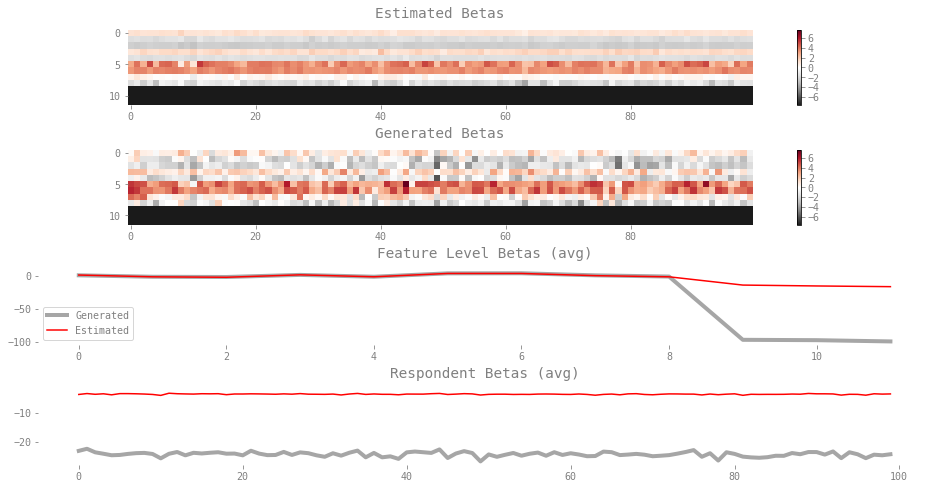

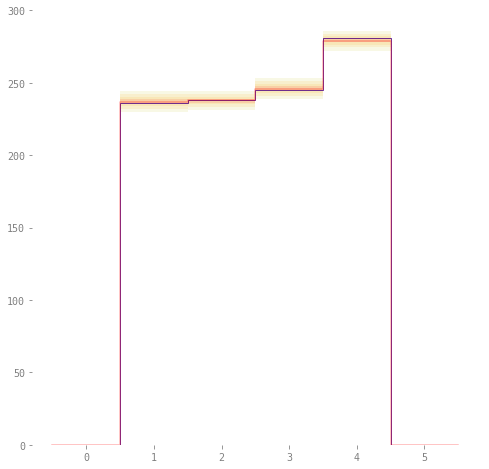

In [55]:
# plot results
print("Results for fit {0}".format(f))
utils.plot_betas(DATA[d], FIT[f])
utils.plot_ppc(DATA[d], FIT[f])

In [56]:
stan_utility.check_all_diagnostics(FIT[f])

n_eff / iter looks reasonable for all parameters
Rhat for parameter L_Omega[1,1] is nan!
Rhat for parameter L_Omega[1,2] is nan!
Rhat for parameter L_Omega[1,3] is nan!
Rhat for parameter L_Omega[2,3] is nan!
Rhat for parameter L_Omega[1,4] is nan!
Rhat for parameter L_Omega[2,4] is nan!
Rhat for parameter L_Omega[3,4] is nan!
Rhat for parameter L_Omega[1,5] is nan!
Rhat for parameter L_Omega[2,5] is nan!
Rhat for parameter L_Omega[3,5] is nan!
Rhat for parameter L_Omega[4,5] is nan!
Rhat for parameter L_Omega[1,6] is nan!
Rhat for parameter L_Omega[2,6] is nan!
Rhat for parameter L_Omega[3,6] is nan!
Rhat for parameter L_Omega[4,6] is nan!
Rhat for parameter L_Omega[5,6] is nan!
Rhat for parameter L_Omega[1,7] is nan!
Rhat for parameter L_Omega[2,7] is nan!
Rhat for parameter L_Omega[3,7] is nan!
Rhat for parameter L_Omega[4,7] is nan!
Rhat for parameter L_Omega[5,7] is nan!
Rhat for parameter L_Omega[6,7] is nan!
Rhat for parameter L_Omega[1,8] is nan!
Rhat for parameter L_Omega[2,8]

In [57]:
print(FIT[f])

Inference for Stan model: anon_model_717653333c81e760ad75085c6f09ce72.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1,1]       0.07    0.01   0.99  -1.83  -0.61   0.08   0.73   1.99   7724    1.0
alpha[2,1]     6.0e-3    0.01   0.94  -1.83  -0.65   0.04   0.66    1.8   7575    1.0
alpha[3,1]       0.08    0.01   0.96  -1.83  -0.57   0.08   0.74   1.96   8308    1.0
alpha[4,1]      -0.37    0.01   0.93  -2.15  -0.98  -0.39   0.23   1.51   6034    1.0
alpha[5,1]       0.01    0.01   0.97  -1.92  -0.64   0.01   0.68   1.88   7136    1.0
alpha[6,1]      -0.32    0.01   0.88  -2.02  -0.92  -0.33   0.28   1.43   6564    1.0
alpha[7,1]      -0.14    0.01   0.98  -2.08   -0.8  -0.16   0.53   1.78   7889    1.0
alpha[8,1]       0.21    0.01   0.97  -1.67  -0.45    0.2   0.88   2.11   7782    1.0
alpha[9,1]     1.8e-3    0.01   0.95 